In [1]:
from vector_drawing import *

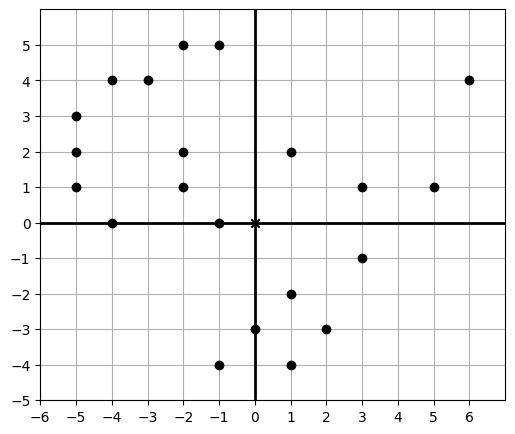

In [2]:
dino_vectors = [(6, 4), (3, 1), (1, 2), (-1, 5), (-2, 5), (-3, 4), (-4, 4),
                (-5, 3), (-5, 2), (-2, 2), (-5, 1), (-4, 0), (-2, 1), (-1, 0), (0, -3),
                (-1, -4), (1, -4), (2, -3), (1, -2), (3, -1), (5, 1)
                ]

draw(
    Points(*dino_vectors)
)

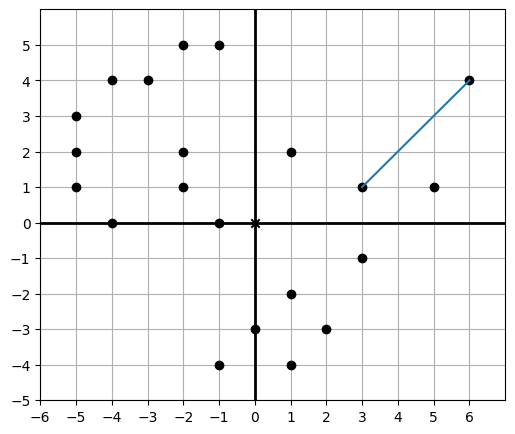

In [3]:
draw(
    Points(*dino_vectors),
    Segment((6, 4), (3, 1))
)

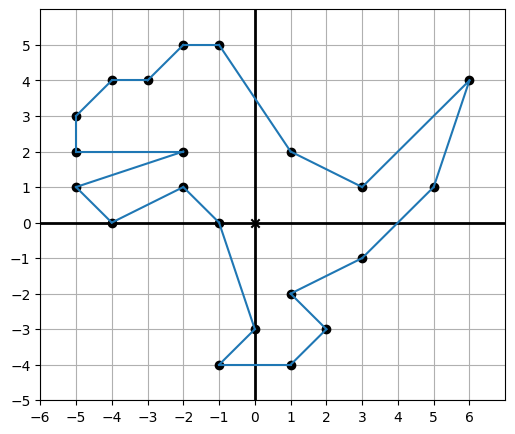

In [4]:
draw(
    Points(*dino_vectors),
    Polygon(*dino_vectors)
)

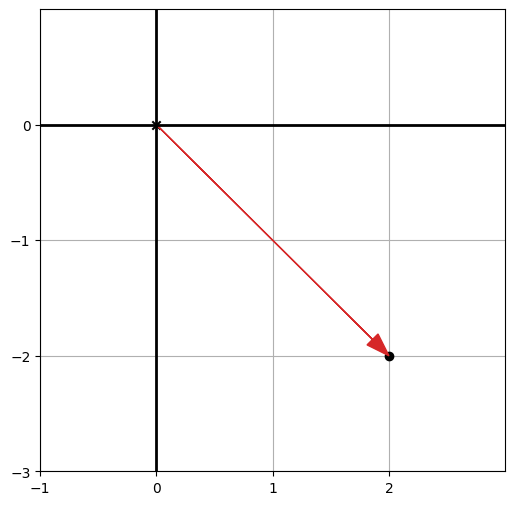

In [5]:
obj1 = Points((2, -2))
obj2 = Arrow((2, -2))

draw(obj1, obj2)

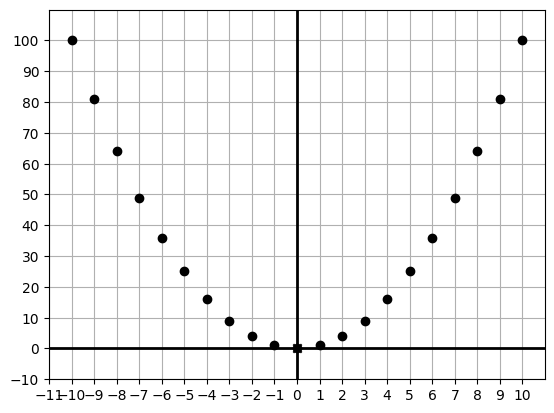

In [6]:
draw(
    Points(*[(x, x ** 2) for x in range(-10, 11)]),
    grid=(1, 10),
    nice_aspect_ratio=False  # don't require x scale to match y scale
)

## 2.2 平面向量运算

向量的加法。

In [7]:
def add_vector(v1, v2):
    return v1[0] + v2[0], v1[1] + v2[1]


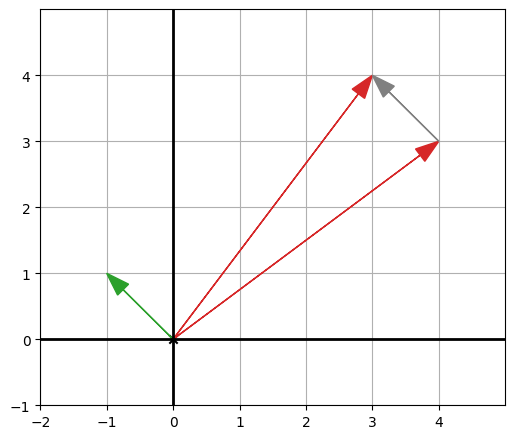

In [8]:
obj1 = Arrow((4, 3))
obj2 = Arrow((-1, 1), color=green)
obj3 = Arrow(tip=(3, 4), tail=(4, 3), color=gray)
res1 = Arrow((3, 4), color=red)

draw(obj1, obj2, res1, obj3)

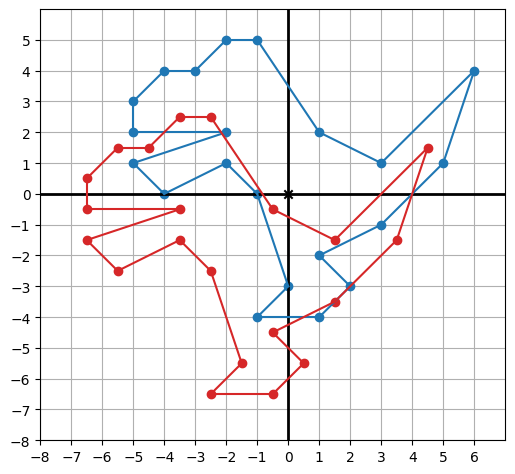

In [9]:
dino_vectors2 = [add_vector((-1.5, -2.5), v) for v in dino_vectors]

draw(
    Points(*dino_vectors, color=blue),
    Polygon(*dino_vectors, color=blue),
    Points(*dino_vectors2, color=red),
    Polygon(*dino_vectors2, color=red)
)


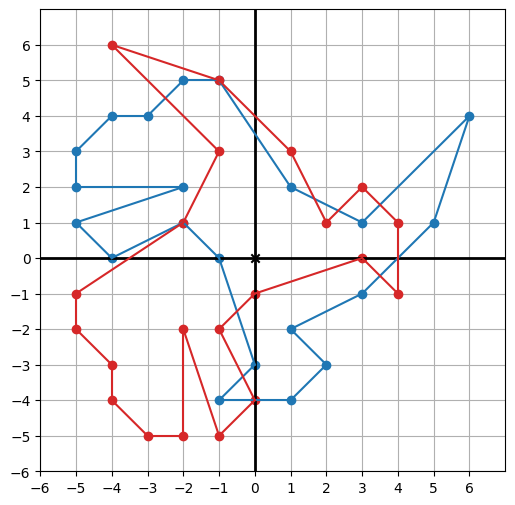

In [10]:
def rotate(vectors, source):
    _result = []
    for vec in vectors:
        # 矩阵向量相乘
        _result.append(np.dot(source, vec))
    return _result


dino_vectors3 = rotate(dino_vectors, [[0, -1], [1, 0]])

draw(
    Points(*dino_vectors, color=blue),
    Polygon(*dino_vectors, color=blue),
    Points(*dino_vectors3, color=red),
    Polygon(*dino_vectors3, color=red)
)

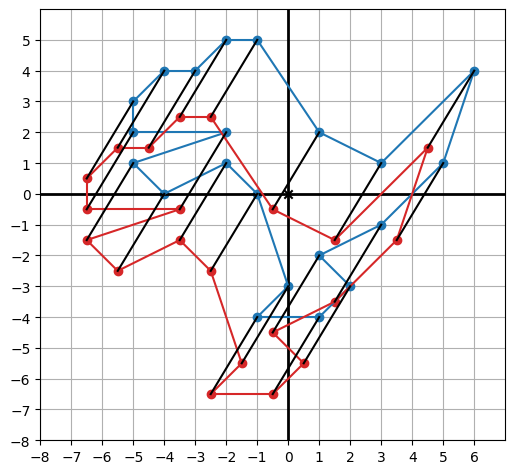

In [11]:
arrows = [Segment(tip, tail, color=black) for (tip, tail) in
          zip(dino_vectors2, dino_vectors)]
draw(
    Points(*dino_vectors, color=blue),
    Polygon(*dino_vectors, color=blue),
    Points(*dino_vectors2, color=red),
    Polygon(*dino_vectors2, color=red),
    *arrows
)

### 2.2.1 向量的分量和长度

求向量的长度

向量数乘

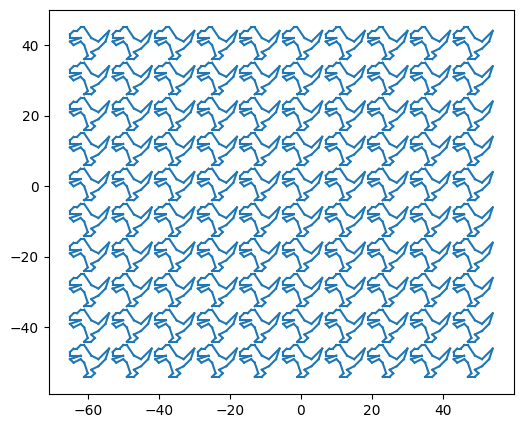

In [12]:
def translate(translation, vectors):
    return [add_vector(translation, v) for v in vectors]


def hundred_dinos():
    translations = [(12 * x, 10 * y)
                    for x in range(-5, 5)
                    for y in range(-5, 5)]
    dinos = [Polygon(*translate(t, dino_vectors), color=blue)
             for t in translations]
    draw(*dinos, grid=None, axes=None, origin=None)


hundred_dinos()

## 2.3 平面上的角度和三角学

正切函数 tan

极坐标和笛卡尔坐标之间的转换

角度以弧度给出时，通常不写弧度单位，或有时记为rad。


In [13]:
from math import tan, pi, sin, cos

# 弧度单位
tan(45)

1.6197751905438615

In [14]:
tan(pi / 4)

0.9999999999999999

In [15]:
def to_cartesian(polar_vector):
    _l, angle = polar_vector[0], polar_vector[1]
    return _l * cos(angle), _l * sin(angle)


def to_rad(deg_val):
    return (deg_val * pi) / 180


def to_deg(rad_val):
    return (rad_val * 180) / pi


to_cartesian((5, to_rad(37)))

(3.993177550236464, 3.0090751157602416)

极坐标到笛卡尔坐标的转换

反正弦 asin

In [16]:
from math import asin

sin(to_rad(30))

0.49999999999999994

In [17]:
asin(0.49999999999999994)

0.5235987755982988

In [18]:
to_rad(30)

0.5235987755982988

In [19]:
from math import atan2

#  接受笛卡尔坐标，返回对应的弧度
atan2(3, -2)


def length(v):
    return sqrt(v[0] ** 2 + v[1] ** 2)


def to_polar(vector):
    """
    return rad
    
    """
    x, y = vector[0], vector[1]
    angle = atan2(y, x)
    return length(vector), angle


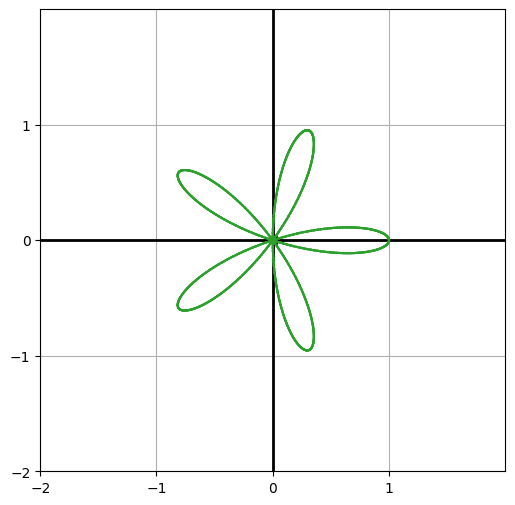

In [20]:
polar_coords = [(cos(x*pi/100.0), 2*pi*x/1000.0) for x in range(0,1000)]

vectors = [to_cartesian(p) for p in polar_coords]

draw(Polygon(*vectors, color=green))

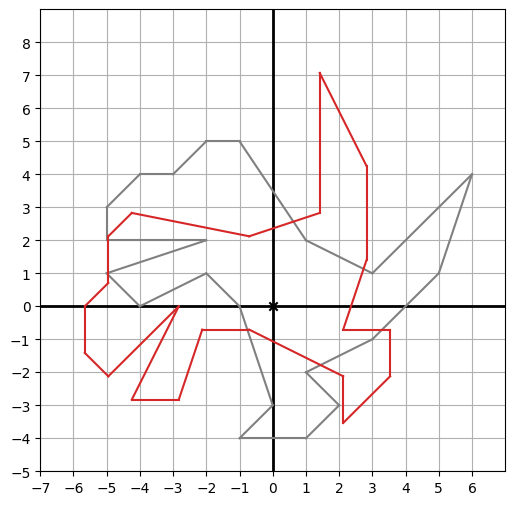

In [21]:
rotation_angle = pi / 4

# 利用极坐标旋转图形
dino_polar = [to_polar(v) for v in dino_vectors]
dino_rotated_polar = [(l,angle + rotation_angle) for l,angle in dino_polar]
dino_rotated = [to_cartesian(p) for p in dino_rotated_polar]

draw(
    Polygon(*dino_vectors, color=gray),
    Polygon(*dino_rotated, color=red)
)

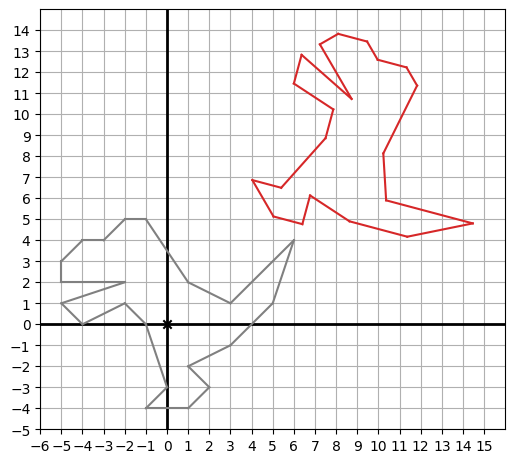

In [22]:
def rotate(angle, _vectors):
    polars = [to_polar(v) for v in _vectors]
    return [to_cartesian((l, a+angle)) for l,a in polars]

new_dino = translate((8,8), rotate(5 * pi / 3, dino_vectors))

draw(
    Polygon(*dino_vectors, color=gray),
    Polygon(*new_dino, color=red)
)

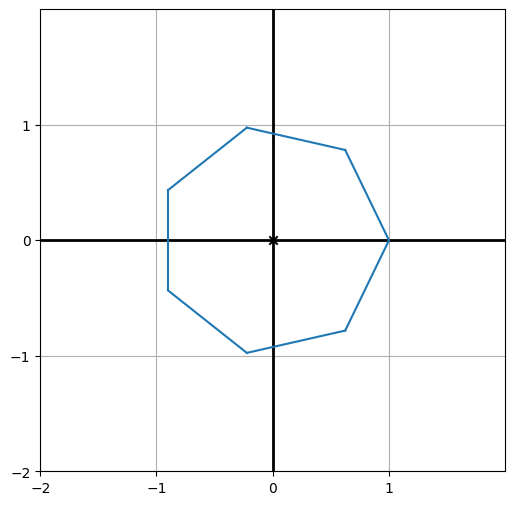

In [23]:

#  n多边形
def regular_polygon(n):
    return [to_cartesian((1, 2*pi*k/n)) for k in range(0,n)]

draw(
    Polygon(*regular_polygon(7))
)

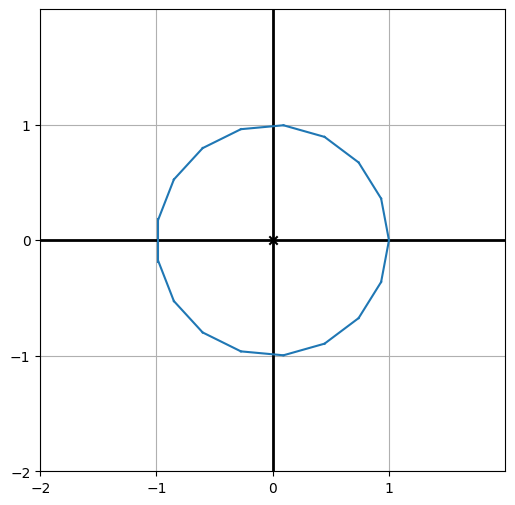

In [26]:
draw(
    Polygon(*regular_polygon(17))
)